In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete038HT1/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete038HT1/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete038HT1/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


TypeError: ignored

In [ ]:

tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

train_data = train_data.shuffle(BATCH_SIZE)

train_dataset = train_data.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [ ]:
import tensorflow as tf

embedding_dim=64
lstm_dim1=64
lstm_dim2=32
dense_dim=64

model = tf.keras.models.Sequential([
           tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim1, return_sequences=True)),
           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim2)),
           tf.keras.layers.Dense(dense_dim, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')                         
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 56s 466ms/step - loss: 0.5407 - accuracy: 0.7043 - val_loss: 0.3852 - val_accuracy: 0.8352
Epoch 2/10
98/98 [==============================] - 45s 457ms/step - loss: 0.2903 - accuracy: 0.8890 - val_loss: 0.3542 - val_accuracy: 0.8552
Epoch 3/10
98/98 [==============================] - 45s 460ms/step - loss: 0.2308 - accuracy: 0.9150 - val_loss: 0.4336 - val_accuracy: 0.8106
Epoch 4/10
98/98 [==============================] - 44s 456ms/step - loss: 0.3746 - accuracy: 0.8436 - val_loss: 0.5164 - val_accuracy: 0.8065
Epoch 5/10
98/98 [==============================] - 45s 461ms/step - loss: 0.2063 - accuracy: 0.9247 - val_loss: 0.4457 - val_accuracy: 0.8317
Epoch 6/10
98/98 [==============================] - 45s 458ms/step - loss: 0.1500 - accuracy: 0.9488 - val_loss: 0.4606 - val_accuracy: 0.8428
Epoch 7/10
98/98 [==============================] - 45s 459ms/step - loss: 0.1387 - accuracy: 0.9541 - val_loss: 0.5702 - val_accuracy: 0.7691

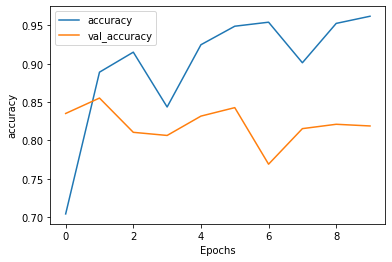

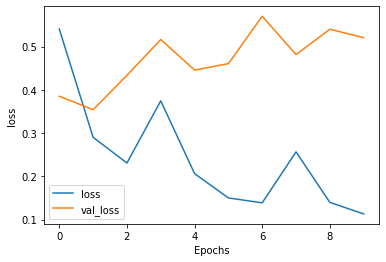

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 51s 464ms/step - loss: 0.5594 - accuracy: 0.6897 - val_loss: 0.3895 - val_accuracy: 0.8417
Epoch 2/10
98/98 [==============================] - 44s 455ms/step - loss: 0.3716 - accuracy: 0.8490 - val_loss: 0.4260 - val_accuracy: 0.8170
Epoch 3/10
98/98 [==============================] - 45s 456ms/step - loss: 0.2832 - accuracy: 0.8891 - val_loss: 0.4903 - val_accuracy: 0.8067
Epoch 4/10
98/98 [==============================] - 45s 459ms/step - loss: 0.2254 - accuracy: 0.9166 - val_loss: 0.4973 - val_accuracy: 0.8223
Epoch 5/10
98/98 [==============================] - 44s 454ms/step - loss: 0.1995 - accuracy: 0.9294 - val_loss: 0.4801 - val_accuracy: 0.8117
Epoch 6/10
98/98 [==============================] - 44s 454ms/step - loss: 0.1649 - accuracy: 0.9436 - val_loss: 0.5076 - val_accuracy: 0.7998
Epoch 7/10
98/98 [==============================] - 45s 457ms/step - loss: 0.1356 - accuracy: 0.9558 - val_loss: 0.5523 - val_accuracy: 0.7899